In [3]:
# add h4d proj root to sys.path so we can import stuff that's in h4d_main/h4d:
# Example: suppose you want to import something from <h4d_main>/h4d/h4d/submodule/:
# "import h4d.submodule" or "from h4d.submodule import foo"
import sys, subprocess
sys.path.append(subprocess.check_output(['git','rev-parse','--show-toplevel']).strip().decode("utf-8") )

In [9]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from collections import Counter
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import os.path
import pylab
import numpy as np
from tqdm import tqdm
import json

# from tqdm import tqdm
from sklearn.model_selection import train_test_split
from h4dlib.data.cocohelpers import *
from h4dlib.config import h4dconfig

pylab.rcParams['figure.figsize'] = (8.0, 10.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load xview coco format, generate the train/val split:

In [10]:
# Seed value 9653 was chosen via the train-val-split-xviewcoco notebook
coco = CocoClassDistHelper(h4dconfig.DATA_DIR / F"Xview/coco_vanilla/xview_coco_v2.json")
train_img_ids, val_img_ids = train_test_split(coco.img_ids, test_size=0.2, random_state=9653)
train_counts, train_percents = coco.get_class_dist(train_img_ids)
val_counts, val_percents = coco.get_class_dist(val_img_ids)
print(np.linalg.norm(train_percents - val_percents))

loading annotations into memory...
Done (t=4.41s)
creating index...
index created!
num images: 846
num annotations: 586868
0.006524270670456624


## Create coco json builder:

In [11]:
output_path = h4dconfig.DATA_DIR / "Xview/coco_vanilla"

In [13]:
val_builder = CocoJsonBuilder(coco.cats, output_path, "xview_coco_val.json")
for idx, img_id in enumerate(val_img_ids):
    val_builder.add_image(coco.imgs[img_id], coco.imgToAnns[img_id])
val_builder.save()

train_builder = CocoJsonBuilder(coco.cats, output_path, "xview_coco_train.json")
for idx, img_id in enumerate(val_img_ids):
    train_builder.add_image(coco.imgs[img_id], coco.imgToAnns[img_id])
train_builder.save()

Writing output to: '/home/gbiamby/school/h4d_main/h4d/h4dlib/../datasets/Xview/coco_vanilla/xview_coco_val.json'
Writing output to: '/home/gbiamby/school/h4d_main/h4d/h4dlib/../datasets/Xview/coco_vanilla/xview_coco_train.json'


## Load the output with the coco api to see if file syntax was correct:

In [14]:
dataDir = h4dconfig.DATA_DIR / 'Xview/coco_vanilla'
# get all images containing given categories, select one at random
coco_new = COCO(os.path.join(dataDir,  "xview_coco_val.json"))
cat_ids = coco_new.getCatIds(catNms=['Truck','Small Car']);
print(F"Category id's: {cat_ids}")
img_ids = coco_new.getImgIds(catIds=cat_ids );
print(F"img_ids: {img_ids}")


loading annotations into memory...
Done (t=0.70s)
creating index...
index created!
Category id's: []
img_ids: [550, 538, 240, 273, 496, 423, 29, 308, 47, 405, 390, 647, 137, 383, 826, 381, 350, 797, 477, 642, 14, 595, 581, 588, 49, 372, 499, 481, 414, 686, 328, 608, 684, 584, 488, 577, 520, 142, 841, 644, 459, 257, 537, 548, 98, 286, 661, 532, 744, 353, 579, 743, 669, 218, 60, 213, 283, 135, 85, 223, 843, 317, 476, 8, 568, 9, 816, 515, 45, 248, 340, 333, 638, 224, 763, 511, 290, 599, 465, 163, 786, 785, 174, 722, 181, 94, 490, 251, 413, 452, 87, 343, 637, 365, 667, 173, 678, 663, 199, 522, 370, 447, 760, 5, 145, 197, 842, 219, 705, 704, 818, 114, 171, 100, 480, 396, 112, 542, 297, 139, 607, 433, 182, 526, 236, 180, 527, 121, 822, 165, 510, 699, 827, 129, 573, 66, 829, 821, 701, 26, 641, 491, 668, 315, 456, 403, 552, 700, 792, 435, 660, 301, 536, 636, 233, 653, 605, 31, 368, 285, 244, 399, 266, 813, 632, 691, 215, 790, 613, 420]


In [15]:
len(coco_new.anns)

133820

Displaying image: {'license': 1, 'file_name': 'COCO_2014_000000000642.jpeg', 'coco_url': '', 'width': 3294, 'height': 3057, 'date_captured': '2018-02-22 00:00:00', 'flickr_url': '', 'id': 642}


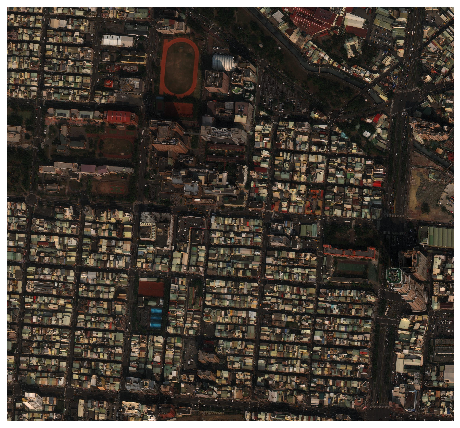

In [16]:
# for img_id in img_ids[:5]:
img = coco_new.loadImgs(img_ids[np.random.randint(0,len(img_ids))])[0]
print(F"Displaying image: {img}")
I = io.imread(dataDir / img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

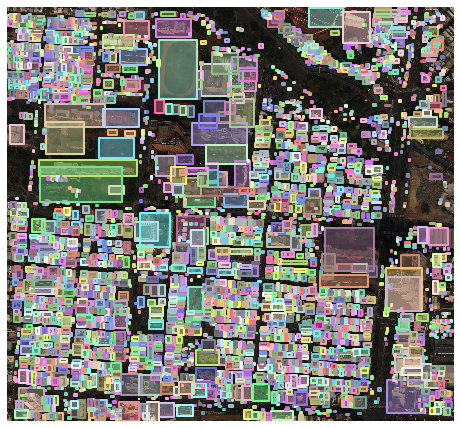

In [17]:
# load and display instance annotations (only for the specified cat_ids)
plt.imshow(I); plt.axis('off')
annIds = coco_new.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco_new.loadAnns(annIds)
coco_new.showAnns(anns)

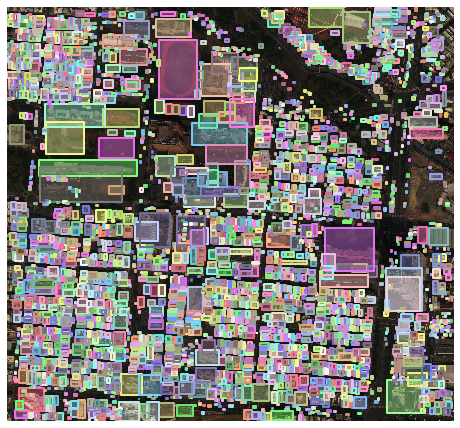

In [18]:
# load and display instance annotations (for *all* cat_ids)
plt.imshow(I); plt.axis('off')
annIds = coco_new.getAnnIds(imgIds=img['id'], iscrowd=None)
anns = coco_new.loadAnns(annIds)
coco_new.showAnns(anns)